Import Data 


In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
import pandas as pd
import numpy as np 
downloaded = drive.CreateFile({'id':'1ZYLTTiAnr6kNIZHnFfYn6GnKkhPfrnqA'}) 
downloaded.GetContentFile('US_Accidents_Dec21_updated.csv')  
df = pd.read_csv('US_Accidents_Dec21_updated.csv')



*   Data preparation and Cleaning - 


1.   Load File 
2.   Look at some information about the data and the columns 
3.   Fix any missing or incorrect values



In [ ]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [ ]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [ ]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


 Questions to Ask 
1. Are there more accidents in warmer or colder areas?
2. which states has the highes no of accidents ? how about per capita?
3. Newyork is not there in the data? Yes 
4. Among top 100 cities in number of accidents, which states do they belong to most frequestly?
5. what time of the day are accidents most frequent in?
6. Which days of the week have most accidents?
7. Which months have the most accidents?
8. What is the trend of accidents year over year (decreasing/increasing)?
9. what is the trend in Arizona?



### To check how many numeric columns do we have 


In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

14

We calculated the percentage of missing values in every column so that we have a idea about the how much missing data do we have.

In [ ]:
missing_percentage = df.isna().sum().sort_values(ascending=False)/ len(df)
missing_percentage

Number                   6.129003e-01
Precipitation(in)        1.931079e-01
Wind_Chill(F)            1.650568e-01
Wind_Speed(mph)          5.550967e-02
Wind_Direction           2.592834e-02
Humidity(%)              2.568830e-02
Weather_Condition        2.482514e-02
Visibility(mi)           2.479350e-02
Temperature(F)           2.434646e-02
Pressure(in)             2.080593e-02
Weather_Timestamp        1.783125e-02
Airport_Code             3.356011e-03
Timezone                 1.285961e-03
Nautical_Twilight        1.007612e-03
Civil_Twilight           1.007612e-03
Sunrise_Sunset           1.007612e-03
Astronomical_Twilight    1.007612e-03
Zipcode                  4.635647e-04
City                     4.814887e-05
Street                   7.029032e-07
Country                  0.000000e+00
Junction                 0.000000e+00
Start_Time               0.000000e+00
End_Time                 0.000000e+00
Start_Lat                0.000000e+00
Turning_Loop             0.000000e+00
Traffic_Sign

Exploratory data analysis


Columns we are analyzing are - 
1. City 
2. Start Time 
3. Start Lat and lng
4. Temperature
5. Weather Condition

In [ ]:
cities = df.City.unique()
len(cities)

11682

In [ ]:
cities_byaccident = df['City'].value_counts()
cities_Nlargest20_byaccident = df['City'].value_counts().nlargest(20)


#### Which are the top 20 cities with highest number of accidents 

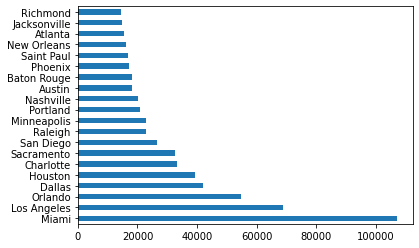

In [ ]:
cities_Nlargest20_byaccident.plot(kind = 'barh')



*   There is No data about NY
*   The number of accidents per city decreases exponentially
*   Less than 5% of the cities have more than 1000 yearly accidents






In [ ]:
import seaborn as sns
sns.set_style('darkgrid')

#### The hist plot below plotted will not showcase the data because histograms are made to represent numerical data, and in our case, we have city names.

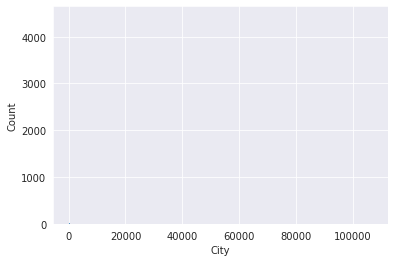

In [ ]:
sns.histplot(cities_byaccident)

In [ ]:
df.Start_Time = pd.to_datetime(df.Start_Time)
df.Start_Time


0         2016-02-08 00:37:08
1         2016-02-08 05:56:20
2         2016-02-08 06:15:39
3         2016-02-08 06:51:45
4         2016-02-08 07:53:43
                  ...        
2845337   2019-08-23 18:03:25
2845338   2019-08-23 19:11:30
2845339   2019-08-23 19:00:21
2845340   2019-08-23 19:00:21
2845341   2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: datetime64[ns]

####A Distplot or distribution plot, depicts the variation in the data distribution. Seaborn Distplot represents the overall distribution of continuous data variables. Below is how a distplot is plotted using seaborn

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


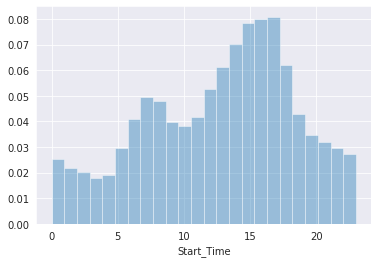

In [ ]:
sns.distplot(df.Start_Time.dt.hour,bins=24, kde=False, norm_hist = True)

#insights
1. In the morning - 5 a.m. to 9 a.m. - higher accidents 
2. In afternoon - 1p.m. to 6 p.m. - highest no. of accidents 


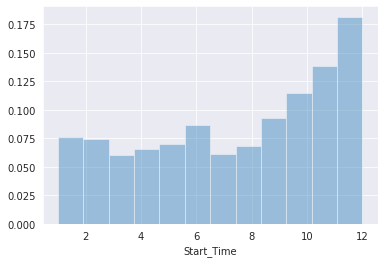

In [ ]:
sns.distplot(df.Start_Time.dt.month,bins=12, kde=False, norm_hist = True)

Insight - Above we can see that the number of accidents rise significantly from the month of October. i.e. more accidents are observed in the winter.
Future scope - we can further analyze is the trend observed over here true or it is due to inconsistency or missing data.

To analyze it we can see the data of individual years


In [ ]:
df_2019 = df[df.Start_Time.dt.year == 2019]

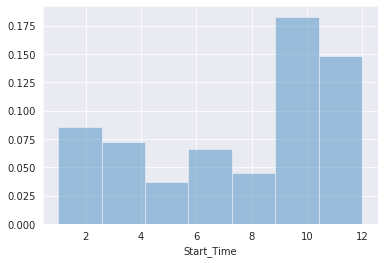

In [ ]:
sns.distplot(df_2019.Start_Time.dt.month, bins=7, kde=False, norm_hist=True)

In [ ]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

start Lat and Long

In [ ]:
df.Start_Lat

0          40.108910
1          39.865420
2          39.102660
3          41.062130
4          39.172393
             ...    
2845337    34.002480
2845338    32.766960
2845339    33.775450
2845340    33.992460
2845341    34.133930
Name: Start_Lat, Length: 2845342, dtype: float64

In [ ]:
df.Start_Lng

0          -83.092860
1          -84.062800
2          -84.524680
3          -81.537840
4          -84.492792
              ...    
2845337   -117.379360
2845338   -117.148060
2845339   -117.847790
2845340   -118.403020
2845341   -117.230920
Name: Start_Lng, Length: 2845342, dtype: float64

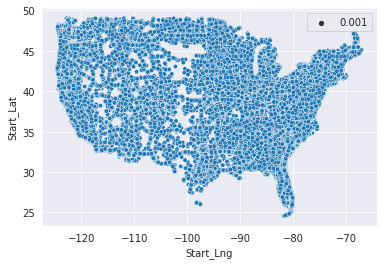

In [ ]:
df_sample = df
sns.scatterplot(x=df.Start_Lng, y=df.Start_Lat, size = 0.001)


In [ ]:
df_sample = df.sample(int(0.1*len(df))) # reduced the data size for faster processing 

In [ ]:
import folium 

In [ ]:
for x in df_sample[['Start_Lat', 'Start_Lng']].iteritems():
  print(x)

('Start_Lat', 920725     32.645719
1936706    37.081415
2305674    33.021861
1173457    34.024728
1358047    35.073356
             ...    
537205     35.825121
2467906    42.005716
914175     33.647522
1432752    34.272622
2783144    38.607182
Name: Start_Lat, Length: 284534, dtype: float64)
('Start_Lng', 920725     -96.780482
1936706   -121.194871
2305674   -117.273214
1173457   -118.411609
1358047    -90.031040
              ...    
537205     -78.586666
2467906    -70.060004
914175     -78.975513
1432752   -118.553774
2783144   -121.273245
Name: Start_Lng, Length: 284534, dtype: float64)


In [ ]:
from folium.plugins import HeatMap

In [ ]:
zip(list(df.Start_Lat), list(df.Start_Lng)) # zip is used to quickly create a dictionary from lists

In [ ]:
map = folium.Map()
HeatMap(list(zip(list(df.Start_Lat), list(df.Start_Lng)))).add_to(map)
map

In [ ]:
df[['Start_Lat', 'Start_Lng']]

,Start_Lat,Start_Lng
0,40.108910,-83.092860
1,39.865420,-84.062800
2,39.102660,-84.524680
3,41.062130,-81.537840
4,39.172393,-84.492792
...,...,...
2845337,34.002480,-117.379360
2845338,32.766960,-117.148060
2845339,33.775450,-117.847790
2845340,33.992460,-118.403020


In [ ]:
df_sample = df.sample(int(0.01*len(df)))
  pairs = list(zip(list(df_sample.Start_Lat), list(df_sample.Start_Lng)))

In [ ]:
import folium
map = folium.Map()
HeatMap(pairs).add_to(map)
map